In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def least_squares(x,y, degree):

  A = np.vander(x, degree+1)

  print(A.shape,y.shape)
  ATA = A.T @ A
  ATy = A.T @ y
  coef = np.linalg.solve(ATA, ATy)
  return np.poly1d(coef)

(5, 6) (5,)
coeffs: [ 34.91937778 -98.09097778  92.81920556 -34.23823056   5.290625
   1.        ]


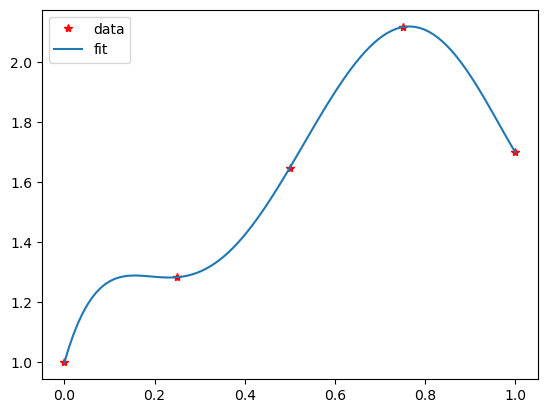

In [3]:
x = np.array([0,0.25,0.5,0.75,1])
y = np.array([1,1.284,1.6487,2.117,1.7])

p2 = least_squares(x,y,5)
print("coeffs:", p2.coefficients)

xd = np.linspace(min(x), max(x), 100)

plt.plot(x,y,'*r')
plt.plot(xd, p2(xd))
plt.legend(['data', 'fit'])
plt.show()

In [6]:
def fft(x):
    N = len(x)
    if N<=1:
        return x
    else:
        even = fft(x[0::2])
        odd = fft(x[1::2])
        factors = np.exp(-2j * np.pi * np.arange(N // 2) / N)
        odd_t = factors * odd
        return np.concatenate([even + odd_t, even - odd_t])

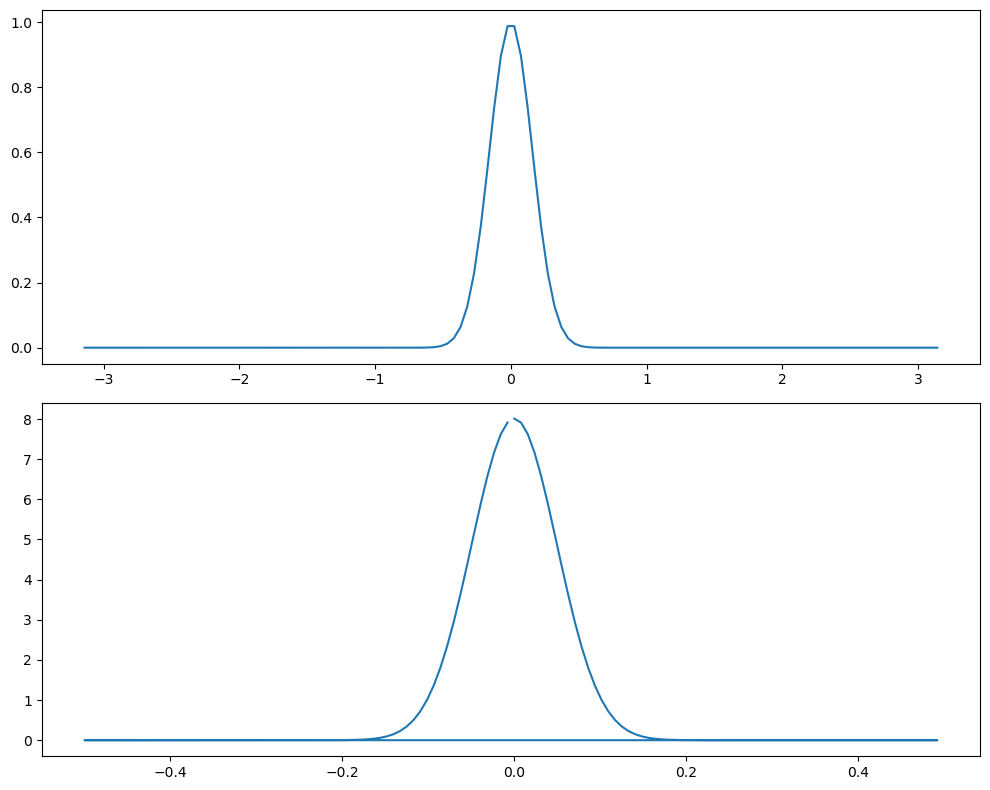

In [14]:
def gaussian(x):
    return np.exp(-20*x**2)

N = 128
x = np.linspace(-np.pi, np.pi, N)
y = gaussian(x)

result = fft(y)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.plot(x, y)
ax2.plot(np.fft.fftfreq(N), np.abs(result))
plt.tight_layout()
plt.show()